### Importing libraries

In [93]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plot
import numpy as np

### Defining function

In [94]:
f = lambda x,y: (1-x)**2 + 100*(y-x**2)**2;

### Plotting Function

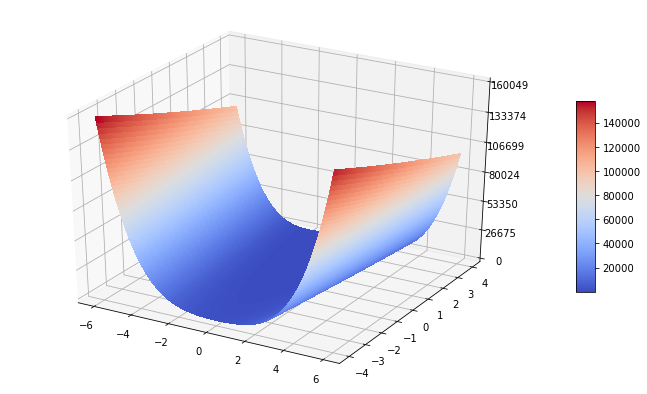

In [95]:
fig = plot.figure(figsize=(12, 7))
ax = fig.gca(projection='3d')

s = 0.05  
X = np.arange(-6, 6, s)   
Y = np.arange(-4, 4, s)
    
#Create the mesh grid(s) for all X/Y combos.
X, Y = np.meshgrid(X, Y)

#Rosenbrock function w/ two parameters using numpy Arrays
Z = f(X,Y)

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)  #Try coolwarm vs jet
ax.zaxis.set_major_locator(LinearLocator(7))
fig.colorbar(surf, shrink=0.5, aspect=10)
plot.show()

## Gradient

<p>The partial gradient of the Rosenbrock function is</p>
$$\nabla f = \left( \begin{array}{c} -2(a-x) - 4 b\ (y - x^2)\ x \\
                         2 b\ (y-x^2) \end{array}  \right)$$

### Function to calculate gradient of rosenbrock function

In [96]:
df = lambda x,y: np.array([-2*(1-x) - 4*100*(y - x**2)*x, 2*100*(y-x**2)])

In [97]:
F = lambda X: f(X[0],X[1])
dF = lambda X: df(X[0],X[1])

### Setting starting points and hyper parameter

In [155]:
x = np.array([-7])
y = np.array([-5])
xy = np.array([x, y])
learning_rate = 0.00001

# evaluating function at x,y
z = F(xy)[0]

### Optimizing the function with gradient descent and saving points x,y and function value at that point

In [156]:
x_s=[] # list to save x-axis points
y_s = [] # list to save y-axis points
f_val =[] # list to save function value at specific x,y


i= 0

# saving inital points values
x_s.append(x)
y_s.append(y)
f_val.append([z])

# I have run 3000 iterations of gradient descent to minimize the function
while(i<3000):
    
    
    #running gradient descent on rosenbrock function
    xy = xy - (learning_rate * dF(xy)) ## optimizing the function
    x, y = xy
    z = F(xy)[0] # function value at specific x,y
    
    #saving points in specific lists
    x_s.append(x)
    y_s.append(y)
    f_val.append([z])
    
    i = i+1

## Visualizing the gradient descent trajectory path 

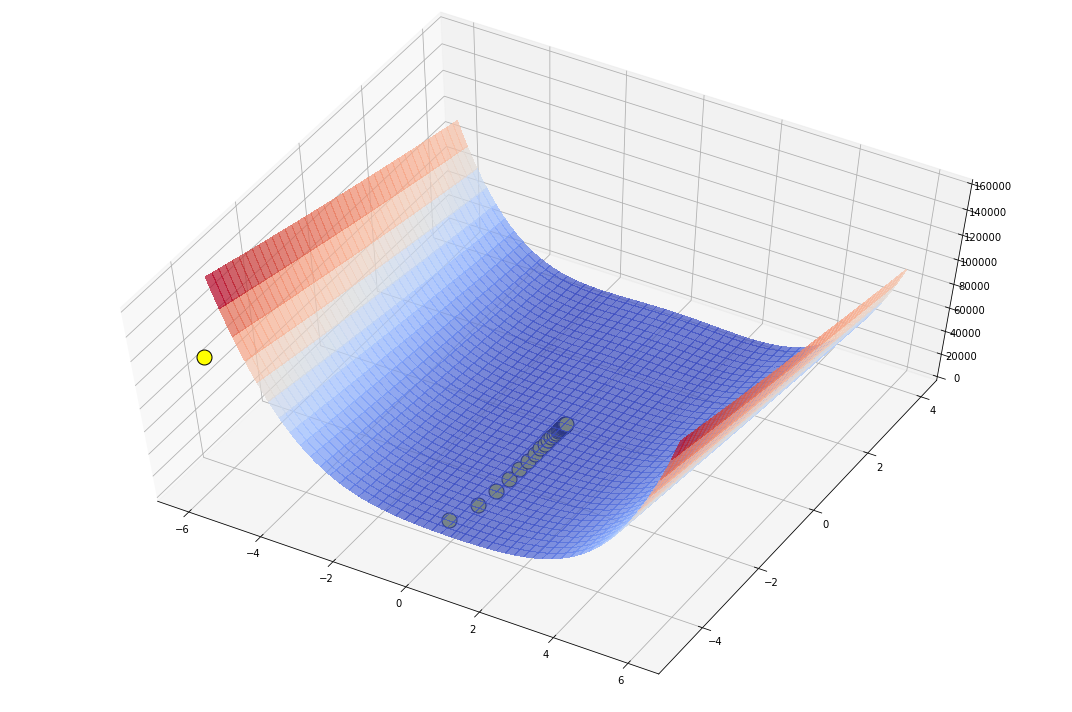

In [157]:
fig = plot.figure(figsize=(15,10))
ax = fig.gca(projection='3d')

ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False, alpha=0.7)

#plotting function value after 100 iterations

for i in range(1,len(x_s)-1,100):
    
    ax.plot(x_s[i], y_s[i], f_val[i], 'o', c='yellow', markersize=15, markeredgecolor='black', markeredgewidth=1)
    x = np.concatenate([x_s[i], x_s[i+1]])
    y = np.concatenate([y_s[i], y_s[i+1]])
    z = np.concatenate([f_val[i], f_val[i+1]])  

ax.view_init(60, -60)

plot.tight_layout()

#### Above plot shows that the rosenbrock function is minimized with Gradient Descent and shown trajectory lead us towards the function global minimum at F(x,y)=0

<hr style="border:2px solid gray"> </hr>